# Ad Predictor

### Problem definition:

#### Implement a proof-of-concept classifier that uses data about banner ads to predict the advertiser represented in an ad, or return "not an ad" if the image isn't an ad, or return "no prediction" if the classifier isn't sufficiently confident. You can find a labeled dataset with representative class frequencies at http://moatsearch-data.s3.amazonaws.com/homework/ad_classification_hw_dataset.json.

#### Use the following cost matrix to inform your implementation and analysis:

```
| predicted   |  correct brand     |  wrong brand  |  non-ad  |  no prediction |
| actual -----|--------------------|---------------|----------|----------------|
| any brand   |         0          |      -20      |    -100  |       -5       |
| non-ad      |         X          |      -40      |     0    |       -5       |
```

#### Questions:
- Discuss the performance of your classifier. For context, include specs for the machine you trained your classifier on.
- Describe the reasoning behind all major design decisions you had to make.
- If you were to keep developing this proof-of-concept, what are some changes you think would be promising to explore next, and why?

## Solution:

### classes for prediction - not_an_ad, [advertiser name]

#### Steps:
```
1. Start by loading data into memory and removing unnecessary fields
2. Add column 'labelOutput' which gives a numerical category to each of the labels
3. Add columns corresponding to features for ocr_logo:
    _: ocr_logos (modify to get a set for every entry)
    x1: ocr_logo_present  = ([] ==0 , _ == count)
    x2: ocr_logos_intersection_index_percentage = [[(labelOutput of intersected label, intersection %)]]
    x3: ocr_logo_intersectionMax_LabelOutput = labelOutput from _x2_ with highest intersection
    x4: ocr_logo_intersectionMax_percentage = intersection % from _x2_ with highest intersection

4. create 

```

In [454]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [78]:
givenData = pd.read_json('http://moatsearch-data.s3.amazonaws.com/homework/ad_classification_hw_dataset.json')
givenData.describe()


,label,md5,ocr_logos,ocr_text,screenshot_url
count,9729,9729,9729,9729,9729
unique,1375,9729,2407,8056,9729
top,not_an_ad,6dbd03573e0610e810f13ac1a8170a71,[],,https://search-creatives.s3.amazonaws.com/64/9...
freq,3400,1,4710,732,1


In [79]:
filtered = givenData
filtered = filtered.drop(['md5', 'screenshot_url'], axis = 1)
filtered 

,label,ocr_logos,ocr_text
0,ashley furniture,[],et happy\nASHLEY\nholidays\nthis is home\n25 l...
1,emirates airline,[Emirates],Emirates\nBUY 2 TICKETS\nFOR THE\nPRICE OF 1!\...
2,verizon wireless,[Verizon Wireless],Gratis\nVerizon\nLG G Pad'\nTM\n7.0 LTE\nApren...
3,walgreens,[Walgreens],Great gifts are right walgreens.\naround the c...
4,hewlett packard,[HP Partner],LA FORCE EST\nPUISSANTE DANS\nNOTRE FAMILLE\nD...
5,not_an_ad,[],II We were guided step by step through\nthe pu...
6,bluehost,[],"EASY, HASSLE-FREE\nWEB HOSTING\nFOR $3.95 /MON..."
7,not_an_ad,[1664],/004\nKRONEN BOURG\n1664\nPICK UP A\nPACK TODA...
8,not_an_ad,[],
9,fashion mia,[Fashion MIA],Fashion\nMia\nCU U\n$18.95\n$9.95\n$14.95\n$14...


In [80]:
# Add column 'Output' which gives a numerical category to each of the labels
from sklearn import preprocessing

label_op = preprocessing.LabelEncoder()

#filtered = filtered.drop('labelOutput', axis=1)
filtered.insert(loc=0, column='labelOutput', value= label_op.fit_transform(filtered.loc[:]['label'])) 
filtered
#not_an_ad labelOutput = 820 , unique labels = 1376 (including not_an_ad)

,labelOutput,label,ocr_logos,ocr_text
0,85,ashley furniture,[],et happy\nASHLEY\nholidays\nthis is home\n25 l...
1,371,emirates airline,[Emirates],Emirates\nBUY 2 TICKETS\nFOR THE\nPRICE OF 1!\...
2,1280,verizon wireless,[Verizon Wireless],Gratis\nVerizon\nLG G Pad'\nTM\n7.0 LTE\nApren...
3,1307,walgreens,[Walgreens],Great gifts are right walgreens.\naround the c...
4,509,hewlett packard,[HP Partner],LA FORCE EST\nPUISSANTE DANS\nNOTRE FAMILLE\nD...
5,820,not_an_ad,[],II We were guided step by step through\nthe pu...
6,167,bluehost,[],"EASY, HASSLE-FREE\nWEB HOSTING\nFOR $3.95 /MON..."
7,820,not_an_ad,[1664],/004\nKRONEN BOURG\n1664\nPICK UP A\nPACK TODA...
8,820,not_an_ad,[],
9,402,fashion mia,[Fashion MIA],Fashion\nMia\nCU U\n$18.95\n$9.95\n$14.95\n$14...


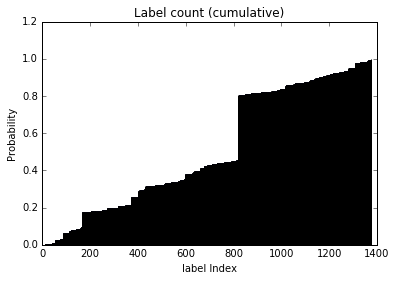

In [444]:
import collections
#plots:
#histogram of ad-distribution - has a long tail; more than 80% of the labels come from less than 20% of ads


[label_op.inverse_transform(k) for k in range(0,1375)]

y_counter = collections.Counter(filtered['labelOutput'].values)

x = range(0,1375)  #1375 unique labels; 820 -> not_an_ad
y = y_counter.values()
y_normed = [float(val)/sum(y_vals) for val in y_vals]
y_cum = np.cumsum(y_normed)
#mostFrequentLabels = y.most_common()

dominantAdLabels = [167, 371, 402, 599, 85, 1308, 1017, 54, 431, 1279, 659, 114, 88, 675, 1174, 575, 1135, 272, 316, 632, 509, 161]
#print([label_op.inverse_transform(k) for k in dominantAdLabels])
#y_ad = [k if idx != 820 else 0 for idx,k in enumerate(y_vals)]

#cumulative plot showing ad label frequencies; the big step -> not_an_ad
plt.bar(x,y_cum)
plt.xlabel('label Index')
plt.ylabel('Probability')
plt.title('Label count (cumulative)')



In [81]:
#1. filter ocr_logos -- [5019/9729 data points with  ocr_logo_present] 
#2. ocr_logos_count

#analysis:
#677 multiple ocr_logos; reduces to 644 when Set is used
#multiple ocr_logos can be insightful. Sometimes ocr_logos (a,b) -> output a; other times ocr_logo b -> output a (eg. unibet)


fil = [set(k) for k in filtered['ocr_logos'].values]
filtered['ocr_logos'] = fil
filteredCount = [len(k) for k in fil]
#filtered = filtered.drop('ocr_logos_count', axis=1)
filtered.insert(loc=2, column='ocr_logos_count', value= filteredCount)
filtered
#filtered.loc[filtered['ocr_logos_count']>1]

,labelOutput,label,ocr_logos_count,ocr_logos,ocr_text
0,85,ashley furniture,0,{},et happy\nASHLEY\nholidays\nthis is home\n25 l...
1,371,emirates airline,1,{Emirates},Emirates\nBUY 2 TICKETS\nFOR THE\nPRICE OF 1!\...
2,1280,verizon wireless,1,{Verizon Wireless},Gratis\nVerizon\nLG G Pad'\nTM\n7.0 LTE\nApren...
3,1307,walgreens,1,{Walgreens},Great gifts are right walgreens.\naround the c...
4,509,hewlett packard,1,{HP Partner},LA FORCE EST\nPUISSANTE DANS\nNOTRE FAMILLE\nD...
5,820,not_an_ad,0,{},II We were guided step by step through\nthe pu...
6,167,bluehost,0,{},"EASY, HASSLE-FREE\nWEB HOSTING\nFOR $3.95 /MON..."
7,820,not_an_ad,1,{1664},/004\nKRONEN BOURG\n1664\nPICK UP A\nPACK TODA...
8,820,not_an_ad,0,{},
9,402,fashion mia,1,{Fashion MIA},Fashion\nMia\nCU U\n$18.95\n$9.95\n$14.95\n$14...


In [263]:
#Add ocr_logo_intersection_full_index column

from difflib import SequenceMatcher

def replacePunct(x):
    import string
    for c in string.punctuation:
        x = x.replace(c,"")
    return x

def getMatchedLabelOutput(xList):
    if(not xList):
        return [(0.0, -1)]
    else:
        lowerX = xList[0].lower()
        lowerXCleaned = replacePunct(lowerX)
        ratios = [SequenceMatcher(None,x, lowerXCleaned).ratio() for x in l]
        zipped = zip(ratios, range(0, len(ratios)))
        return max(zipped)

def genDict(labelToks, labelIndex):
    return {labelTok:labelIndex for labelTok in labelToks if len(labelTok)>0}

def normalizeIndex(index, listLength):
    if listLength is 0:
        return -1
    else:
        return index

def isWordInDict(word):
    return [True for ad_dict_key in ad_dict_keys if word in ad_dict_key]
    
def genList(wordSet, index):
    return [True for word in wordSet if len(isWordInDict(word))>0]

def getIndexAndPercentage(word):
    index = ad_dict[word]
    labelOutput = label_op.inverse_transform(index)
    percentageOverlap = float(len(word))/len(labelOutput)
    return (index, word, percentageOverlap)

def getIntersectionIndices(wordSet):
    return [getIndexAndPercentage(word.lower()) for word in wordSet if word.lower() in ad_dict]

#gives a list of indices for which the words in wordSet have an intersect with one of the ad_dict keys
def getIntersection(sentence):
    res = getIntersectionIndices(set(sentence.split(' ')))
    return res
        
ad_dict_list = [genDict(label_op.inverse_transform(k).split(' '),k) for k in range(0,1375)]

# this is a dictionary of all label tokens to their corresponding labelOutput. Duplicates are not considered
ad_dict = {}

for elemDict in ad_dict_list:
    for key in elemDict:
        if (key not in ad_dict):
            ad_dict[key] = elemDict[key]
        else:
            del ad_dict[key]

            
ocr_logos = filtered['ocr_logos'].values

intersection_index_percentage_list = []
for idx, o_set in enumerate(ocr_logos):
    #o_set example -> {'buscape', 'ford'}
    o_set_list = []
    for sentence in o_set:
        sentenceLower = sentence.lower()
        label = filtered['label'].values[idx]
        labelOutput = filtered['labelOutput'].values[idx]
        if (sentenceLower in label):
            percentage = float(len(sentenceLower))/len(label)
            o_set_list = o_set_list + [[(labelOutput, sentenceLower, percentage)]]
        else:
            intersect = getIntersection(sentence)
            if (len(intersect)>0):
                o_set_list = o_set_list + [getIntersection(sentence)]
        
    intersection_index_percentage_list = intersection_index_percentage_list + [o_set_list]
    

#intersection_index_percentage_list    
filtered = filtered.drop('ocr_logos_intersection_index_percentage', axis = 1)
filtered.insert(loc=3, column='ocr_logos_intersection_index_percentage', value= intersection_index_percentage_list)
filtered


,labelOutput,label,ocr_logos_count,ocr_logos_intersection_index_percentage,ocr_logos,ocr_text
0,85,ashley furniture,0,[],{},et happy\nASHLEY\nholidays\nthis is home\n25 l...
1,371,emirates airline,1,"[[(371, emirates, 0.5)]]",{Emirates},Emirates\nBUY 2 TICKETS\nFOR THE\nPRICE OF 1!\...
2,1280,verizon wireless,1,"[[(1280, verizon wireless, 1.0)]]",{Verizon Wireless},Gratis\nVerizon\nLG G Pad'\nTM\n7.0 LTE\nApren...
3,1307,walgreens,1,"[[(1307, walgreens, 1.0)]]",{Walgreens},Great gifts are right walgreens.\naround the c...
4,509,hewlett packard,1,[],{HP Partner},LA FORCE EST\nPUISSANTE DANS\nNOTRE FAMILLE\nD...
5,820,not_an_ad,0,[],{},II We were guided step by step through\nthe pu...
6,167,bluehost,0,[],{},"EASY, HASSLE-FREE\nWEB HOSTING\nFOR $3.95 /MON..."
7,820,not_an_ad,1,[],{1664},/004\nKRONEN BOURG\n1664\nPICK UP A\nPACK TODA...
8,820,not_an_ad,0,[],{},
9,402,fashion mia,1,"[[(402, fashion mia, 1.0)]]",{Fashion MIA},Fashion\nMia\nCU U\n$18.95\n$9.95\n$14.95\n$14...


In [471]:
#add column - ocr_logos_intersection_maxIndex
#add column - ocr_logos_intersection_maxpercentage

col = filtered['ocr_logos_intersection_index_percentage'].values
res = []
for entrySets in col:
    entryList = []
    if (len(entrySets)==0):
        res = res + []
    else:
        for e in entrySets:
            opLabelMax = (0,'',0.0)
            for k in range(0,len(e)):
                if e[k][2]>opLabelMax[2]:
                    opLabelMax = (e[k][0],e[k][1],e[k][2])
            entryList = entryList + [opLabelMax]
    res = res + [entryList]       

filtered = filtered.drop('ocr_logos_intersection_index_maxIndex', axis = 1)
filtered = filtered.drop('ocr_logos_intersection_index_maxPercentage', axis = 1)
filtered.insert(loc=3, column='ocr_logos_intersection_index_maxIndex', value= [r[0][0] if len(r)>0 else -1 for r in res])        
filtered.insert(loc=4, column='ocr_logos_intersection_index_maxPercentage', value= [r[0][2] if len(r)>0 else 0.0 for r in res])        
filtered

,labelOutput,label,ocr_logos_count,ocr_logos_intersection_index_maxIndex,ocr_logos_intersection_index_maxPercentage,ocr_logos_intersection_index_percentage,ocr_logos,ocr_text
0,85,ashley furniture,0,-1,0.000000,[],{},et happy\nASHLEY\nholidays\nthis is home\n25 l...
1,371,emirates airline,1,371,0.500000,"[[(371, emirates, 0.5)]]",{Emirates},Emirates\nBUY 2 TICKETS\nFOR THE\nPRICE OF 1!\...
2,1280,verizon wireless,1,1280,1.000000,"[[(1280, verizon wireless, 1.0)]]",{Verizon Wireless},Gratis\nVerizon\nLG G Pad'\nTM\n7.0 LTE\nApren...
3,1307,walgreens,1,1307,1.000000,"[[(1307, walgreens, 1.0)]]",{Walgreens},Great gifts are right walgreens.\naround the c...
4,509,hewlett packard,1,-1,0.000000,[],{HP Partner},LA FORCE EST\nPUISSANTE DANS\nNOTRE FAMILLE\nD...
5,820,not_an_ad,0,-1,0.000000,[],{},II We were guided step by step through\nthe pu...
6,167,bluehost,0,-1,0.000000,[],{},"EASY, HASSLE-FREE\nWEB HOSTING\nFOR $3.95 /MON..."
7,820,not_an_ad,1,-1,0.000000,[],{1664},/004\nKRONEN BOURG\n1664\nPICK UP A\nPACK TODA...
8,820,not_an_ad,0,-1,0.000000,[],{},
9,402,fashion mia,1,402,1.000000,"[[(402, fashion mia, 1.0)]]",{Fashion MIA},Fashion\nMia\nCU U\n$18.95\n$9.95\n$14.95\n$14...


In [475]:
#remove all not_an_ad entries and entries with no ocr_logo_intersection output

filtered2 = filtered.loc[filtered['labelOutput'] != 820]
filtered2 = filtered2.loc[filtered['ocr_logos_intersection_index_maxIndex'] != -1]

3482

<IPython.core.display.Javascript object>


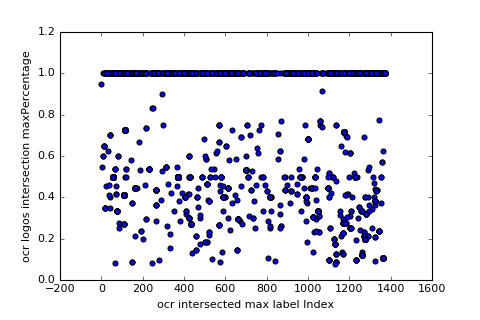

In [490]:
#2d plot fo maxIndex vs labelOutput

x = filtered2['ocr_logos_intersection_index_maxIndex'].values
y = filtered2['ocr_logos_intersection_index_maxPercentage'].values 
z = filtered2['labelOutput'].values

plt.scatter(x,y)
plt.xlabel('ocr intersected max label Index')
plt.ylabel('ocr logos intersection maxPercentage')

# There are quite a few noisy points, but the decrease significantly below 0.8

Using matplotlib backend: nbAgg


<IPython.core.display.Javascript object>


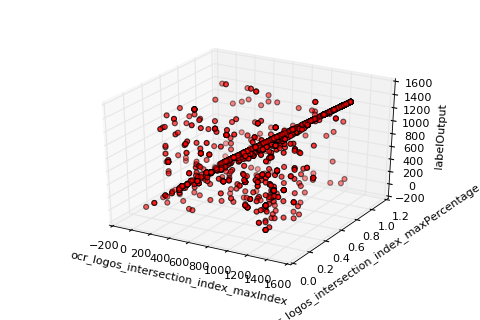

In [491]:
# 3d Plot for features -> (ocr_logos_intersection_index_maxIndex, ocr_logos_intersection_index_maxPercentage) with labelOutput
from mpl_toolkits.mplot3d import Axes3D
%matplotlib

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x,y,z, c='r', marker='o')
ax.set_xlabel('ocr_logos_intersection_index_maxIndex')
ax.set_ylabel('ocr_logos_intersection_index_maxPercentage')
ax.set_zlabel('labelOutput')

#ax2.scatter(x, z, c='r', marker='o')


In [487]:
df_randomized = filtered
df_randomized = df_randomized.reindex(np.random.permutation(df_randomized.index))

,ocr_logos_count,ocr_logos_intersection_index_maxIndex,ocr_logos_intersection_index_maxPercentage
9612,2,-1,0.000000
1918,0,-1,0.000000
2866,1,1308,1.000000
1490,0,-1,0.000000
3326,0,-1,0.000000
7067,1,1363,0.108108
1753,0,-1,0.000000
9492,1,1118,1.000000
3953,0,-1,0.000000
8398,2,599,1.000000


In [634]:
#Keep 60% training, 20% cross-validation test, 20% validation test..Remove validationTest part
splitAt = int(0.2 * len(df_randomized))

valTest = df_randomized[0:splitAt]
cv_trainTest = df_randomized[splitAt:]
cv_trainTest

,labelOutput,label,ocr_logos_count,ocr_logos_intersection_index_maxIndex,ocr_logos_intersection_index_maxPercentage,ocr_logos_intersection_index_percentage,ocr_logos,ocr_text
5423,114,banggoodcom,0,-1,0.000000,[],{},g good Warm & Soft Five Sizes\nBan\nPolar Flee...
7059,820,not_an_ad,0,-1,0.000000,[],{},
8546,820,not_an_ad,0,-1,0.000000,[],{},slippers\nreinvented\nbuy now\n
2660,454,geico,0,-1,0.000000,[],{},CLICK HERE TO SAVE CeECO.\nHAMBURG OFFICE\n15%...
7619,820,not_an_ad,0,-1,0.000000,[],{},UUUUUUU CSabecas.COM\nj 40202105\nLOS MEJORES\...
844,1056,shopathomecom,0,-1,0.000000,[],{},Movie Deals\nSign up today and get\na $10 Cash...
5031,114,banggoodcom,1,114,0.727273,"[[(114, banggood, 0.727272727273)]]",{Banggood},Ban\ng good\nCom\nThick\nWindproof\n$32.99\n
4676,1174,the home depot,2,523,0.384615,"[[(1322, home, 0.16), (523, decorators, 0.3846...","{Home Decorators Collection, The Home Depot}","HOME\nDECORATORS\nDISCOVER BATH VANITIES,\nRUG..."
5170,841,open english,1,841,1.000000,"[[(841, open english, 1.0)]]",{Open English},Promesas 2016\n1 Hablar in glee\n2 ender 10k\n...
8590,820,not_an_ad,0,-1,0.000000,[],{},R555.748\nYou make 55k\nDAY\nYou Look like\nTH...


In [639]:
#create training and test splits
from sklearn.svm import SVC
from sklearn.cross_validation import KFold
from sklearn import cross_validation

predictors = ["ocr_logos_count", "ocr_logos_intersection_index_maxIndex", "ocr_logos_intersection_index_maxPercentage"]
#kf = KFold(cv_trainTest.shape[0], n_folds=3, random_state=1)

clf = SVC('linear')

scores = cross_validation.cross_val_score(clf, cv_trainTest[predictors].values, cv_trainTest["labelOutput"].values, cv=3)
#print(scores.mean())

#predictions = []
#for train, test in kf:
#    train_predictors = (cv_trainTest[predictors].iloc[train,:].astype(np.float32, copy=False).values)
#    train_target = (cv_trainTest["labelOutput"].iloc[train].values)
#    clf.fit(train_predictors, train_target)
    #test_predictions = clf.predict(cv_trainTest[predictors].iloc[test,:])
    #predictions.append(test_predictions)


    #predictions    

TypeError: a float is required

In [524]:
X = df_randomized[['ocr_logos_count', 'ocr_logos_intersection_index_maxIndex', 'ocr_logos_intersection_index_maxPercentage']]
Y = df_randomized[['labelOutput']]

#Keep 60% training, 20% cross-validation test, 20% validation test
splitAt = int(0.2 * len(Y))

X_valTest = X[0:splitAt]
Y_valTest = Y[0:splitAt]

X_cv = X[splitAt:]
Y_cv = Y[splitAt:]

#titanic[predictors].iloc[train,:]



,ocr_logos_count,ocr_logos_intersection_index_maxIndex,ocr_logos_intersection_index_maxPercentage
5423,0,-1,0.000000
7059,0,-1,0.000000
8546,0,-1,0.000000
2660,0,-1,0.000000
7619,0,-1,0.000000
844,0,-1,0.000000
5031,1,114,0.727273
4676,2,523,0.384615
5170,1,841,1.000000
8590,0,-1,0.000000


In [567]:
#train svm to predict labels - (using linear classifier)
from sklearn.cross_validation import KFold
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC

kf = KFold(len(X_cv), n_folds=3, shuffle=True, random_state=0)

clf = SVC('linear')


# for train_index, test_index in kf:
#     print("TRAIN:", train_index, "TEST:", test_index)
#     x_train, x_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index
 
h = Y_cv.values.ravel()
i = X_cv.values.ravel()

h

#clf.fit(h,i) 
#scores = cross_validation.cross_val_score(clf, X_cv, Y_cv, cv=3)
                                        
                                        
                                        
                                                                                

array([114, 820, 820, ..., 201, 926, 371])

In [ ]:
#plot learning curves
from sklearn.learning_curve import learning_curve
title = 'Learning Curves (SVM, linear kernel, $\gamma=%.6f$)' %classifier.best_estimator_.gamma
estimator = SVC(kernel='linear', gamma=classifier.best_estimator_.gamma)
plot_learning_curve(estimator, title, X_train, y_train, cv=cv)
plt.show()